# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [246]:
df = pd.read_csv('data/data.csv')
df2 = pd.read_csv('data/data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

- Show 5 rows, selected at random, from the data set.

In [247]:
df.sample(n=5)

,Species Common Name,Scientific Name,TaxonClass,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient
277,"Stork, Saddle-billed",Ephippiorhynchus senegalensis,Aves,123.0,12.9,8.0,19.5,60.0,11.3,5.2,21.1,63.0,16.3,5.4,19.5,yes,yes
138,"Ibex, Nubian",Capra nubiana,Mammalia,629.0,9.6,7.8,10.1,277.0,9.1,6.7,10.4,351.0,9.6,7.9,10.6,NaN,NaN
194,"Monkey, SchmidtÕs Red-tailed",Cercopithecus ascanius schmidti,Mammalia,187.0,16.0,13.8,18.3,82.0,14.3,11.5,20.0,99.0,16.8,14.2,18.3,NaN,NaN
165,"Lemur, Mongoose",Eulemur mongoz,Mammalia,161.0,22.8,21.4,26.6,83.0,25.1,20.1,30.3,78.0,22.3,19.5,26.6,yes,yes
76,"Dove, Black-naped Fruit",Ptilinopus melanospilus,Aves,330.0,6.5,5.2,7.3,178.0,6.1,4.5,7.3,150.0,7.0,5.2,8.8,NaN,NaN


- Show each of the column names and their data types.

In [248]:
animals = [tuple(r) for r in df.to_numpy()]
df = pd.DataFrame(animals, columns=['Species Common Name', 'Scientific Name', 'TaxonClass', 'Overall Sample Size', 'Overall MLE', 'Overall CI - lower', 'Overall CI - upper', 'Male Sample Size', 'Male MLE', 'Male CI - lower', 'Male CI - upper', 'Female Sample Size', 'Female MLE', 'Female CI - lower', 'Female CI - upper', 'Male Data Deficient', 'Female Data Deficient'])
datatypes = df.dtypes
datatypes

Species Common Name       object
Scientific Name           object
TaxonClass                object
Overall Sample Size      float64
Overall MLE              float64
Overall CI - lower       float64
Overall CI - upper       float64
Male Sample Size         float64
Male MLE                 float64
Male CI - lower          float64
Male CI - upper          float64
Female Sample Size       float64
Female MLE               float64
Female CI - lower        float64
Female CI - upper         object
Male Data Deficient       object
Female Data Deficient     object
dtype: object

- Show any unique features of your chosen data set.

I chose to show all the columns from the data set.

In [251]:
df.keys()

Index(['Species Common Name', 'Scientific Name', 'TaxonClass',
       'Overall Sample Size', 'Overall MLE', 'Overall CI - lower',
       'Overall CI - upper', 'Male Sample Size', 'Male MLE', 'Male CI - lower',
       'Male CI - upper', 'Female Sample Size', 'Female MLE',
       'Female CI - lower', 'Female CI - upper', 'Male Data Deficient',
       'Female Data Deficient'],
      dtype='object')

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

The data was very clean already. What I had to fix was some special characters that were not converted correctly and were corrupting the Species Common Names.

In [ ]:
df['Species Common Name'] = df['Species Common Name'].str.replace('�','è')
df['Species Common Name'] = df['Species Common Name'].str.replace('Õ','\'')
df['Scientific Name'] = df['Scientific Name'].str.replace('Ê','')
print(df.loc[68,'Species Common Name'])
print(df.loc[194,'Species Common Name'])
print(df.loc[315,'Species Common Name'])
print(df.loc[8,'Scientific Name'])
print(df.loc[173,'Scientific Name'])

Deer, Père David's
Monkey, Schmidt's Red-tailed
Wallaby, Bennett's
Argusianus argus
Heloderma horridum exasperatum


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

The first statistical analysis performed was just to show the names of the animals and their corresponding overall, female and male median life expectancy.

In [ ]:
df = df[ ['Species Common Name', 'Overall MLE', 'Male MLE', 'Female MLE', 'TaxonClass'] ]
df

,Species Common Name,Overall MLE,Male MLE,Female MLE,TaxonClass
0,Addax,13.4,12.3,14.4,Mammalia
1,"Agouti, Brazilian",8.1,8.8,7.8,Mammalia
2,"Alligator, Chinese",30.9,25.9,32.8,Reptilia
3,"Anoa, Lowland",17.7,16.3,18.8,Mammalia
4,"Anteater, Giant",19.7,19.4,19.7,Mammalia
...,...,...,...,...,...
325,"Woodhoopoe, Green",5.4,6.0,4.3,Aves
326,"Wood-partridge, Crested",4.8,5.0,4.7,Aves
327,"Zebra, Grevy's",14.1,11.2,16.5,Mammalia
328,"Zebra, Hartmann's Mountain",13.9,12.3,15.4,Mammalia


This statistical analysis shows the species common names of the animals who have their male median life expectancy higher than the mean, which is 13.

In [ ]:
df[df["Male MLE"] > 13]

,Species Common Name,Overall MLE,Male MLE,Female MLE,TaxonClass
2,"Alligator, Chinese",30.9,25.9,32.8,Reptilia
3,"Anoa, Lowland",17.7,16.3,18.8,Mammalia
4,"Anteater, Giant",19.7,19.4,19.7,Mammalia
9,"Armadillo, Southern Three-banded",17.6,16.4,18.7,Mammalia
10,"Baboon, Hamadryas",27.3,27.2,27.5,Mammalia
...,...,...,...,...,...
296,"Tiger, Malayan",16.1,16.1,14.5,Mammalia
297,"Tiger, Sumatran",18.4,18.2,18.8,Mammalia
309,"Turaco, Violaceous",14.1,15.7,11.8,Aves
311,"Turtle, Coahuilan Box",14.6,14.5,14.9,Reptilia


This statistical analysis shows the main features of the dataset.

In [ ]:
df.describe()

,Overall MLE,Male MLE,Female MLE
count,328.000000,324.000000,326.00000
mean,13.404878,13.391049,13.45184
std,7.527497,7.463315,7.83753
min,2.400000,2.600000,2.40000
25%,7.800000,7.900000,7.42500
50%,12.050000,11.550000,11.80000
75%,16.625000,17.300000,16.57500
max,47.000000,51.300000,43.30000


This statistical analysis groups the animals by their taxonomy class, and sorts the values in descending order by the overall median life expectancy.

In [ ]:
df.groupby( ['TaxonClass'] ).mean().sort_values('Overall MLE', ascending=False)

,Overall MLE,Male MLE,Female MLE
TaxonClass,,,
Chondrichthyes,16.400000,17.050000,14.200000
Mammalia,14.711429,14.116860,15.108140
Aves,12.202419,12.940650,11.873387
Reptilia,11.628571,11.980952,11.319048
Amphibia,5.366667,5.533333,5.183333
Arachnida,NaN,NaN,17.200000


This statistical analysis groups the animals by their taxonomy class and sorts the values by their female median life expectancy in descending order.

In [ ]:
df2 = df2[ ['Species Common Name', 'Female MLE', 'TaxonClass'] ]

df2.groupby( ['TaxonClass'] ).mean().sort_values('Female MLE', ascending=False)

,Female MLE
TaxonClass,
Arachnida,17.200000
Mammalia,15.108140
Chondrichthyes,14.200000
Aves,11.873387
Reptilia,11.319048
Amphibia,5.183333


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

I created a histogram that shows the overall median life expectancy and the number of species that have that specific median life expectancy.

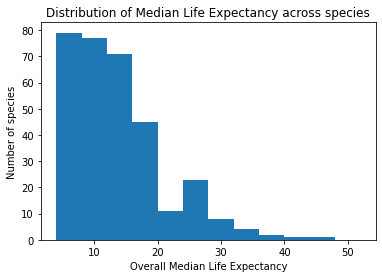

In [ ]:
df = pd.read_csv('data/data.csv')
bins = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52]

plt.hist(df['Overall MLE'], bins = bins)
plt.ylabel('Number of species')
plt.xlabel('Overall Median Life Expectancy')
plt.title('Distribution of Median Life Expectancy across species')
plt.show()

This is a histogram that compares the female and male median life expectancy.

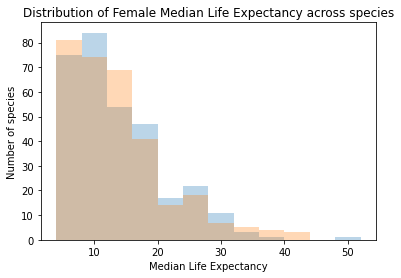

In [ ]:
df = pd.read_csv('data/data.csv')
bins = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52]
plt.hist(df['Male MLE'], bins = bins, alpha=0.3)
plt.hist(df['Female MLE'], bins = bins, alpha=0.3)

plt.ylabel('Number of species')
plt.xlabel('Median Life Expectancy')
plt.title('Distribution of Female Median Life Expectancy across species')
plt.show()

This is a pie chart that compares the amount of species across the taxonomy classes.

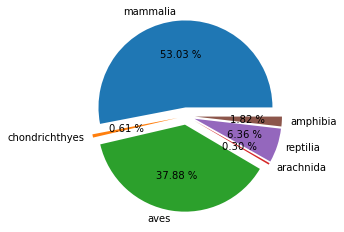

In [ ]:
df3 = pd.read_csv('data/data.csv')
df3 = df3[ ['TaxonClass'] ]

mammalia = df.loc[df['TaxonClass'] == 'Mammalia'].count()[0]
chondrichthyes = df.loc[df['TaxonClass'] == 'Chondrichthyes'].count()[0]
arachnida = df.loc[df['TaxonClass'] == 'Arachnida'].count()[0]
aves = df.loc[df['TaxonClass'] == 'Aves'].count()[0]
reptilia = df.loc[df['TaxonClass'] == 'Reptilia'].count()[0]
amphibia = df.loc[df['TaxonClass'] == 'Amphibia'].count()[0]

labels = ['mammalia', 'chondrichthyes', 'aves', 'arachnida', 'reptilia', 'amphibia']
explode = (.1, .1, .1, .1, .1, .1)

plt.pie([mammalia, chondrichthyes, aves, arachnida, reptilia, amphibia], labels = labels, autopct = '%.2f %%', explode = explode)
plt.show()

This is a scattered plot that compares the male median life expectancy with the overall median life expectancy.

<AxesSubplot:xlabel='Overall MLE', ylabel='Male MLE'>

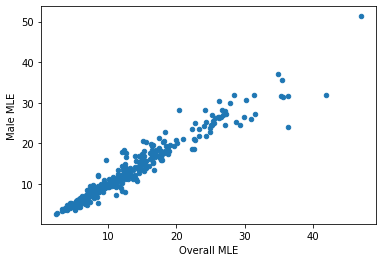

In [ ]:
df4 = pd.read_csv('data/data.csv')

df4.plot.scatter(x='Overall MLE', y='Male MLE')


This is a scattered plot that compares the female median life expectancy with the overall median life expectancy.

<AxesSubplot:xlabel='Overall MLE', ylabel='Female MLE'>

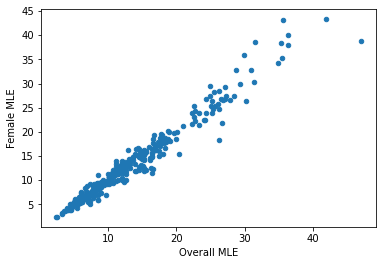

In [ ]:
df4 = pd.read_csv('data/data.csv')

df4.plot.scatter(x='Overall MLE', y='Female MLE')